In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Análisis exploratorio de los datos

In [3]:
data = pd.read_csv("Data_RecommendationSystem.csv")
pd.set_option('display.max_columns', 50)

In [4]:
data.head()

,ClientID,JoinDate,Gender,Married,Birth,MarvelFavoriteCharacter,Occupation,Iron Man,The Incredible Hulk,Iron Man 2,Thor,Captain America: The First Avenger,The Avengers,Iron Man 3,Thor: The Dark World,Captain America: The Winter Soldier,Guardians of Galaxy,Avengers: Age of Ultron,Ant-Man,Captain America: Civil War,Doctor Strange,Guardians of Galaxy 2,Spider-Man: Homecoming,Thor: Ragnarok,Black Panther,Avengers: Infinity War,Ant-Man and the Wasp,Captain Marvel,Avengers: Endgame,Spider-Man: Far From Home,Black Widow,Shang-Chi and the Legend of the Ten Rings,Eternals,Spider-Man: No Way Home
0,4WKQSBB,1/2/2019,F,M,1987,MJ,politicians,4,2,10,0,6,0,2,9,-1,6,8,-1,4,3,9,10,2,4,8,9,9,-1,10,8,10,1,10
1,CP5S02H,1/6/2019,F,M,1981,Spider-Man,politicians,-1,9,0,10,-1,-1,1,10,10,2,-1,6,9,0,5,10,1,9,4,-1,9,9,10,9,10,1,10
2,2YKDILJ,1/6/2013,M,U,1991,Iron Man,hotel/restaurant,10,-1,10,-1,-1,4,10,-1,-1,4,1,2,3,0,9,-1,-1,9,2,7,4,8,6,-1,4,-1,2
3,2S9E81J,1/8/2019,M,M,1990,MJ,shopkeepers,10,5,7,-1,-1,0,-1,9,10,6,2,-1,3,2,3,10,5,0,9,4,-1,9,10,-1,9,-1,10
4,BHDYVFT,1/8/2019,M,M,1990,Iron Man,politicians,10,2,10,2,4,1,10,0,1,2,-1,5,8,3,8,3,-1,-1,8,-1,8,2,2,4,1,9,7


In [5]:
observaciones, variables = data.shape

In [6]:
print("El conjunto de datos tiene", observaciones, "observaciones y", variables, "variables.")

El conjunto de datos tiene 29128 observaciones y 34 variables.


In [7]:
print(data.isnull().sum())

ClientID                                     0
JoinDate                                     0
Gender                                       0
Married                                      0
Birth                                        0
MarvelFavoriteCharacter                      0
Occupation                                   0
Iron Man                                     0
The Incredible Hulk                          0
Iron Man 2                                   0
Thor                                         0
Captain America: The First Avenger           0
The Avengers                                 0
Iron Man 3                                   0
Thor: The Dark World                         0
Captain America: The Winter Soldier          0
Guardians of Galaxy                          0
Avengers: Age of Ultron                      0
Ant-Man                                      0
Captain America: Civil War                   0
Doctor Strange                               0
Guardians of 

In [8]:
for col in data.columns:
    n_spaces = (data[col] == ' ').sum()
    print(f"Columna {col} tiene {n_spaces} valores con espacios.")

Columna ClientID tiene 0 valores con espacios.
Columna JoinDate tiene 0 valores con espacios.
Columna Gender tiene 0 valores con espacios.
Columna Married tiene 0 valores con espacios.
Columna Birth tiene 0 valores con espacios.
Columna MarvelFavoriteCharacter tiene 0 valores con espacios.
Columna Occupation tiene 0 valores con espacios.
Columna Iron Man tiene 0 valores con espacios.
Columna The Incredible Hulk tiene 0 valores con espacios.
Columna Iron Man 2 tiene 0 valores con espacios.
Columna Thor tiene 0 valores con espacios.
Columna Captain America: The First Avenger tiene 0 valores con espacios.
Columna The Avengers tiene 0 valores con espacios.
Columna Iron Man 3 tiene 0 valores con espacios.
Columna Thor: The Dark World tiene 0 valores con espacios.
Columna Captain America: The Winter Soldier tiene 0 valores con espacios.
Columna Guardians of Galaxy tiene 0 valores con espacios.
Columna Avengers: Age of Ultron tiene 0 valores con espacios.
Columna Ant-Man tiene 0 valores con e

In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29128 entries, 0 to 29127
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   ClientID                                   29128 non-null  object
 1   JoinDate                                   29128 non-null  object
 2   Gender                                     29128 non-null  object
 3   Married                                    29128 non-null  object
 4   Birth                                      29128 non-null  int64 
 5   MarvelFavoriteCharacter                    29128 non-null  object
 6   Occupation                                 29128 non-null  object
 7   Iron Man                                   29128 non-null  int64 
 8   The Incredible Hulk                        29128 non-null  int64 
 9   Iron Man 2                                 29128 non-null  int64 
 10  Thor                              

El conjunto de datos tiene 29128 observaciones, 34 variables y no contiene valores nulos.

A primera vista se observa que:

1. Se cuenta con datos sobre las impresiones que tienen los usuarios sobre cada película de Marvel, esto es de gran utilidad para diseñar un sistema de recomendaciones.
2. Se proporciona información sobre el personaje de Marvel preferido de cada usuario, lo que permite personalizar aún más las recomendaciones.
3. Algunos usuarios no han tenido la oportunidad de ver todas las películas de Marvel, lo cual puede ser relevante al momento de abordar el tratamiento de los datos incompletos.
4. La variable "Birth" podría ser útil para deducir información adicional, tal como la edad.


In [10]:
print(data["Gender"].value_counts(),"\n")
# Porcentaje
print(data["Gender"].value_counts(normalize=True))

M    20325
F     8803
Name: Gender, dtype: int64 

M    0.697782
F    0.302218
Name: Gender, dtype: float64


In [11]:
print(data["Married"].value_counts(),"\n")
# Porcentaje
print(data["Married"].value_counts(normalize=True))

M    22910
S     3267
U     2473
W      301
D      135
R       34
P        7
f        1
Name: Married, dtype: int64 

M    0.786528
S    0.112160
U    0.084901
W    0.010334
D    0.004635
R    0.001167
P    0.000240
f    0.000034
Name: Married, dtype: float64


In [12]:
print(data["Occupation"].value_counts(),"\n")
# Porcentaje
print(data["Occupation"].value_counts(normalize=True))

politicians         18617
hotel/restaurant     5551
shopkeepers          3655
freelancers           627
engineers             576
doctors               102
Name: Occupation, dtype: int64 

politicians         0.639144
hotel/restaurant    0.190573
shopkeepers         0.125481
freelancers         0.021526
engineers           0.019775
doctors             0.003502
Name: Occupation, dtype: float64


Podemos observar una falta de equilibrio en las variables que marcan el Género, el estado civil y su cargo, siendo aprox. un 70% hombres y un 30% mujeres, con un porcentaje aprox. de un 78% de usuarios casados, seguidos de un 11% solteros y un 8% sin determinar y por último tenemos que aprox. un 64% de usuarios tienen cargos políticos frente a un 19% que trabajan en hostelería, 12% en comercios, un 2% autónomos e ingenieros y apenas un 0,03% médicos.

Si se entrena un modelo con datos sesgados y se despliega de forma productiva, es probable que el modelo refleje el sesgo presente en los datos de entrenamiento. En consecuencia, puede hacer recomendaciones inexactas o discriminatorias.

Además, el sesgo en las variables de género, estado civil y ocupación podría resultar en una falta de diversidad en las recomendaciones, lo que podría llevar a una experiencia menos satisfactoria para los usuarios que no se ajusten al perfil predominante en los datos.



In [13]:
# Puntuación media de cada película.
# Sacamos de la media aquellas peliculas que no se han sido vistas.
scores = data.iloc[:, 7:].replace(-1, np.nan)

# Media de las puntuaciónes.
mean_scores = scores.mean()

# Ordena las medias (de mayor a menor) para una mejor visualización.
medias_ordenadas = mean_scores.sort_values(ascending=False)
print("Puntuación media de cada película:")
print(medias_ordenadas)

Puntuación media de cada película:
Iron Man 2                                   7.015046
Iron Man                                     6.995568
Iron Man 3                                   6.985954
Spider-Man: Far From Home                    6.149067
Spider-Man: Homecoming                       6.120736
Spider-Man: No Way Home                      6.115216
Black Widow                                  5.877050
Avengers: Age of Ultron                      5.800095
Avengers: Infinity War                       5.778392
Captain America: Civil War                   5.778087
Avengers: Endgame                            5.772710
The Avengers                                 5.760920
Captain America: The First Avenger           5.756883
Captain America: The Winter Soldier          5.755388
Guardians of Galaxy                          5.693261
Guardians of Galaxy 2                        5.690737
Thor: Ragnarok                               5.262695
Thor                                         5.

In [14]:
# Película más vista
# Calculo del número de veces votadas cada película
num_valoraciones = data.iloc[:, 7:].apply(lambda x: x[x!=-1].count())

# Ordenar las películas por número de valoraciones (de mayor a menor)
pelisMasVista = num_valoraciones.sort_values(ascending=False)

print("Película más vista:")
print(pelisMasVista[:1])

Película más vista:
Iron Man    23013
dtype: int64


In [15]:
# Película menos vista
# Ordenar las películas por número de valoraciones (de mayor a menor)
pelisMenosVista = num_valoraciones.sort_values(ascending=True)

print("Película menos vista:")
print(pelisMenosVista[:1])

Película menos vista:
Shang-Chi and the Legend of the Ten Rings    19942
dtype: int64


In [16]:
# Película que tiene más valoraciones negativas (de 0 a 4) 
# Filtrar por columnas de películas y contar valores menores o iguales a 4
negativas = (data.iloc[:,7:]).apply(lambda x: x[(x >= 0) & (x <= 4)].count())
negativas_ordenadas = negativas.sort_values(ascending=False)
print("Película con más valoraciones negativas:")
print(negativas_ordenadas[:1])

Película con más valoraciones negativas:
Black Panther    9207
dtype: int64


In [17]:
# Película que tiene más valoraciones positivas (de 6 a 10) 
# Filtrar por columnas de películas y contar valores menores o iguales a 4
positivas = (data.iloc[:,7:]).apply(lambda x: x[(x >= 6) & (x <= 10)].count())
positivas_ordenadas = positivas.sort_values(ascending=False)
print("Película con más valoraciones positivas:")
print(positivas_ordenadas[:1])

Película con más valoraciones positivas:
Iron Man    15452
dtype: int64


In [18]:
data2 = data.copy()
data2["Total votos"] = data2.iloc[:,7:34].apply(lambda row: row[row >= 0].sum(), axis=1)
data2["Pelis vistas"] = data2.iloc[:,7:34].apply(lambda row: row[row >= 0].count(), axis=1)
data2["Media"] = data2["Total votos"] / data2["Pelis vistas"]
data2["Total votos negativos"] = data2.iloc[:,7:34].apply(lambda row: row[(row >= 0) & (row <=4)].count(), axis=1)

In [19]:
data2

,ClientID,JoinDate,Gender,Married,Birth,MarvelFavoriteCharacter,Occupation,Iron Man,The Incredible Hulk,Iron Man 2,Thor,Captain America: The First Avenger,The Avengers,Iron Man 3,Thor: The Dark World,Captain America: The Winter Soldier,Guardians of Galaxy,Avengers: Age of Ultron,Ant-Man,Captain America: Civil War,Doctor Strange,Guardians of Galaxy 2,Spider-Man: Homecoming,Thor: Ragnarok,Black Panther,Avengers: Infinity War,Ant-Man and the Wasp,Captain Marvel,Avengers: Endgame,Spider-Man: Far From Home,Black Widow,Shang-Chi and the Legend of the Ten Rings,Eternals,Spider-Man: No Way Home,Total votos,Pelis vistas,Media,Total votos negativos
0,4WKQSBB,1/2/2019,F,M,1987,MJ,politicians,4,2,10,0,6,0,2,9,-1,6,8,-1,4,3,9,10,2,4,8,9,9,-1,10,8,10,1,10,144,24,6.000000,10
1,CP5S02H,1/6/2019,F,M,1981,Spider-Man,politicians,-1,9,0,10,-1,-1,1,10,10,2,-1,6,9,0,5,10,1,9,4,-1,9,9,10,9,10,1,10,144,22,6.545455,7
2,2YKDILJ,1/6/2013,M,U,1991,Iron Man,hotel/restaurant,10,-1,10,-1,-1,4,10,-1,-1,4,1,2,3,0,9,-1,-1,9,2,7,4,8,6,-1,4,-1,2,95,18,5.277778,10
3,2S9E81J,1/8/2019,M,M,1990,MJ,shopkeepers,10,5,7,-1,-1,0,-1,9,10,6,2,-1,3,2,3,10,5,0,9,4,-1,9,10,-1,9,-1,10,123,20,6.150000,7
4,BHDYVFT,1/8/2019,M,M,1990,Iron Man,politicians,10,2,10,2,4,1,10,0,1,2,-1,5,8,3,8,3,-1,-1,8,-1,8,2,2,4,1,9,7,110,23,4.782609,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29123,DGGSWFM,1/1/2019,M,M,1990,Thor,politicians,10,10,-1,10,6,-1,-1,10,6,5,-1,3,-1,8,7,-1,10,4,-1,7,-1,10,-1,10,3,7,3,129,18,7.166667,4
29124,EPIUEO4,1/9/2018,M,M,1970,Spider-Man,politicians,-1,0,4,-1,-1,6,6,-1,0,6,-1,8,6,9,10,10,-1,0,-1,-1,-1,7,10,0,0,-1,10,92,17,5.411765,6
29125,8SBA93U,1/9/2019,F,M,1974,Iron Man,politicians,10,2,10,8,9,7,10,8,8,2,1,3,2,-1,0,-1,-1,-1,3,-1,1,5,4,-1,1,6,7,107,21,5.095238,10
29126,Y73ETTO,1/11/2018,M,M,1987,Groot,hotel/restaurant,9,7,-1,7,6,-1,1,3,-1,10,1,4,7,8,10,2,5,2,3,0,-1,-1,4,-1,4,10,-1,103,20,5.150000,10


In [20]:
# Usuarios con medias más altas
data2[['ClientID', 'Media']].sort_values('Media', ascending=False)[:5]

,ClientID,Media
8495,HIUVZYE,8.642857
7299,V27GRQV,8.333333
12416,C9BGB85,8.277778
28092,QHDM85I,8.266667
12759,KPEKZ2S,8.210526


In [21]:
# Usuarios que han visto más películas
data2[['ClientID', 'Pelis vistas']].sort_values('Pelis vistas', ascending=False)[:5]

,ClientID,Pelis vistas
26568,DZD5PS6,27
17291,DMNILIL,27
10796,3C6E1CL,27
10933,N6M9DKH,27
1225,Y6HDEWH,27


In [22]:
# Usuarios con más valoraciones negativas
data2[['ClientID', 'Total votos negativos']].sort_values('Total votos negativos', ascending=False)[:5]

,ClientID,Total votos negativos
21898,76MRPYG,18
7363,QWUNKQB,17
14077,4W7A368,17
28890,MS46S4M,17
5814,O803UVX,17


In [23]:
import datetime

In [24]:
# Calcular edad del usuario
data['Age'] = datetime.datetime.now().year - data['Birth']

# Calcular meses que lleva siendo cliente el usuario
data['MonthsClient'] = (datetime.datetime.now() - pd.to_datetime(data['JoinDate'], format='%d/%m/%Y')) // datetime.timedelta(days=30)

# Porcentaje de peliculas de Marvel que ha visto
data['MarvelFilmsPerc'] = (data2["Pelis vistas"] * 100) / 27

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29128 entries, 0 to 29127
Data columns (total 37 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ClientID                                   29128 non-null  object 
 1   JoinDate                                   29128 non-null  object 
 2   Gender                                     29128 non-null  object 
 3   Married                                    29128 non-null  object 
 4   Birth                                      29128 non-null  int64  
 5   MarvelFavoriteCharacter                    29128 non-null  object 
 6   Occupation                                 29128 non-null  object 
 7   Iron Man                                   29128 non-null  int64  
 8   The Incredible Hulk                        29128 non-null  int64  
 9   Iron Man 2                                 29128 non-null  int64  
 10  Thor                  

In [26]:
data.head()

,ClientID,JoinDate,Gender,Married,Birth,MarvelFavoriteCharacter,Occupation,Iron Man,The Incredible Hulk,Iron Man 2,Thor,Captain America: The First Avenger,The Avengers,Iron Man 3,Thor: The Dark World,Captain America: The Winter Soldier,Guardians of Galaxy,Avengers: Age of Ultron,Ant-Man,Captain America: Civil War,Doctor Strange,Guardians of Galaxy 2,Spider-Man: Homecoming,Thor: Ragnarok,Black Panther,Avengers: Infinity War,Ant-Man and the Wasp,Captain Marvel,Avengers: Endgame,Spider-Man: Far From Home,Black Widow,Shang-Chi and the Legend of the Ten Rings,Eternals,Spider-Man: No Way Home,Age,MonthsClient,MarvelFilmsPerc
0,4WKQSBB,1/2/2019,F,M,1987,MJ,politicians,4,2,10,0,6,0,2,9,-1,6,8,-1,4,3,9,10,2,4,8,9,9,-1,10,8,10,1,10,36,51,88.888889
1,CP5S02H,1/6/2019,F,M,1981,Spider-Man,politicians,-1,9,0,10,-1,-1,1,10,10,2,-1,6,9,0,5,10,1,9,4,-1,9,9,10,9,10,1,10,42,47,81.481481
2,2YKDILJ,1/6/2013,M,U,1991,Iron Man,hotel/restaurant,10,-1,10,-1,-1,4,10,-1,-1,4,1,2,3,0,9,-1,-1,9,2,7,4,8,6,-1,4,-1,2,32,121,66.666667
3,2S9E81J,1/8/2019,M,M,1990,MJ,shopkeepers,10,5,7,-1,-1,0,-1,9,10,6,2,-1,3,2,3,10,5,0,9,4,-1,9,10,-1,9,-1,10,33,45,74.074074
4,BHDYVFT,1/8/2019,M,M,1990,Iron Man,politicians,10,2,10,2,4,1,10,0,1,2,-1,5,8,3,8,3,-1,-1,8,-1,8,2,2,4,1,9,7,33,45,85.185185


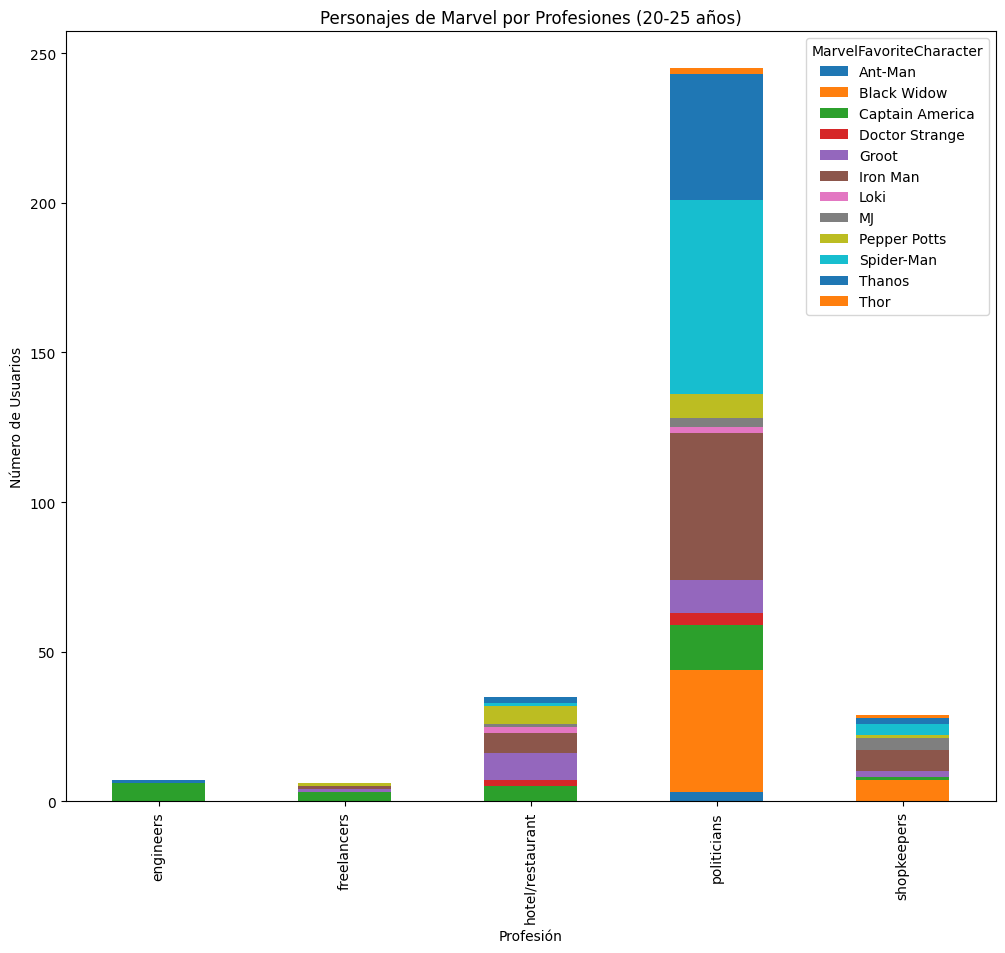

In [27]:
# Filtrar usuarios de entre 20 y 25 años
filtered_data = data[(data['Age'] >= 20) & (data['Age'] <= 25)]

# Contar usuarios por profesión y personaje de Marvel
counts = filtered_data.groupby(['Occupation', 'MarvelFavoriteCharacter']).size().unstack()

# Hacer gráfica de barras apiladas
counts.plot(kind='bar', stacked=True, figsize=(12,10))
plt.xlabel('Profesión')
plt.ylabel('Número de Usuarios')
plt.title('Personajes de Marvel por Profesiones (20-25 años)')
plt.show()

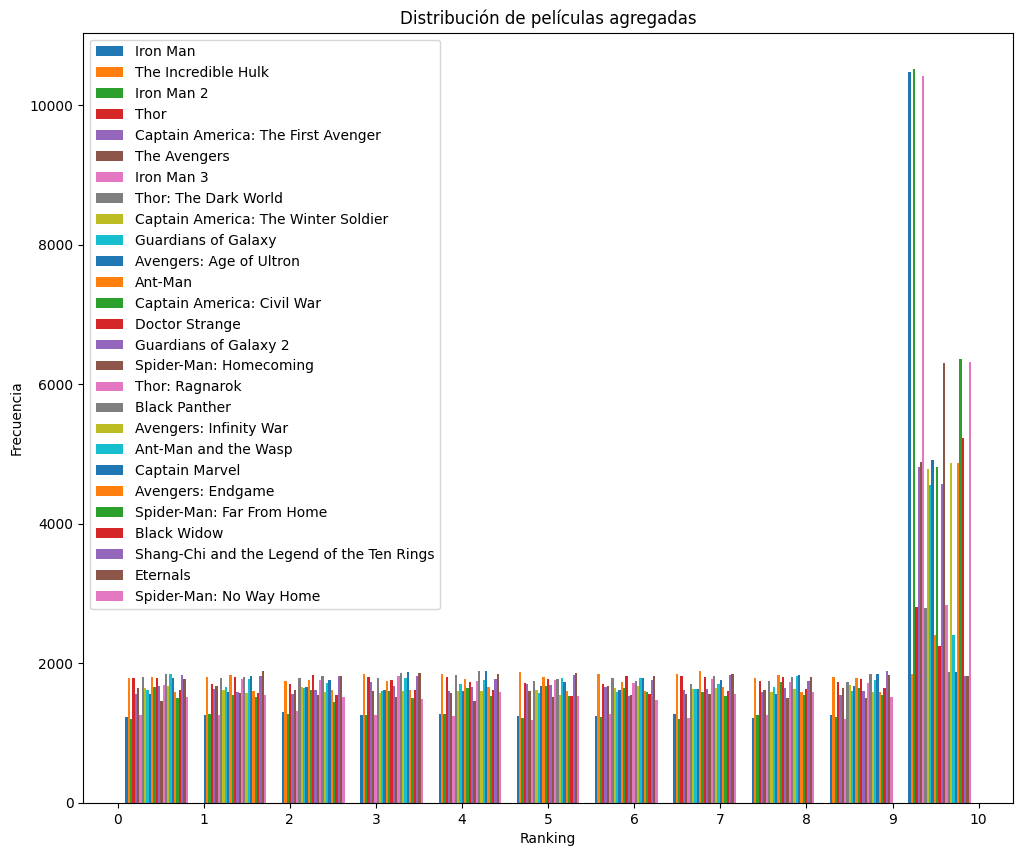

In [28]:
# Opción 1
# Distribución de los rankings de las películas agregadas separadas por cada pelicula
# Convertir cada fila en una lista de valores
lista = data.iloc[:,7:34].apply(lambda row: row[row >= 0].tolist(), axis=0)
plt.figure(figsize=(12, 10))
plt.hist(lista, bins=11)

# Agregar títulos y etiquetas a los ejes
plt.title('Distribución de películas agregadas')
plt.xlabel('Ranking')
plt.ylabel('Frecuencia')
plt.legend(lista.index)
plt.xticks(range(0,11))

# Mostrar el histograma
plt.show()

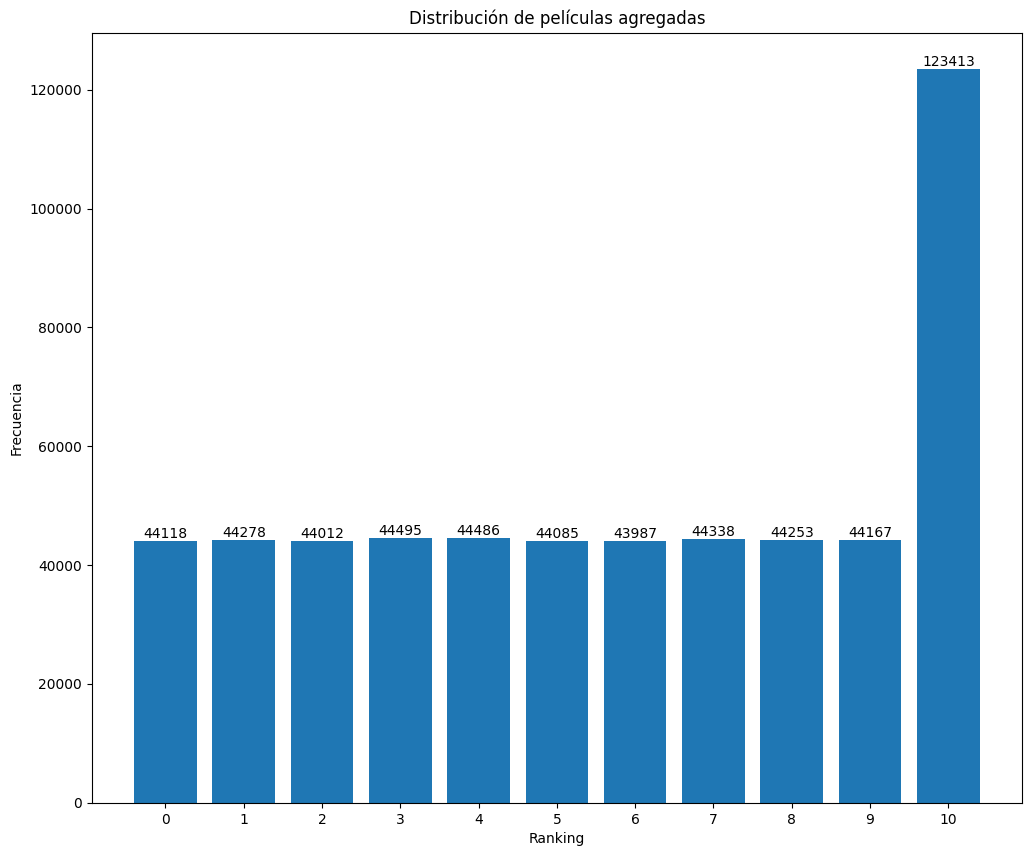

In [29]:
# Opción 2
# Distribución de los rankings de las películas agregadas en conjunto
lista_unica = [elemento for sublista in lista.values for elemento in sublista]
# Calcular el histograma de la lista
frecuencias, bins = np.histogram(lista_unica, bins=range(0, 12))

# Crear el gráfico de barras
plt.figure(figsize=(12,10))
plt.bar(bins[:-1], frecuencias)

# Agregar títulos y etiquetas a los ejes
plt.title('Distribución de películas agregadas')
plt.xlabel('Ranking')
plt.ylabel('Frecuencia')
plt.xticks(range(0,11))

# Agregar las frecuencias encima de cada barra
for i, freq in enumerate(frecuencias):
    plt.text(bins[i], freq, str(freq), ha='center', va='bottom')

# Mostrar el histograma
plt.show()

<Axes: >

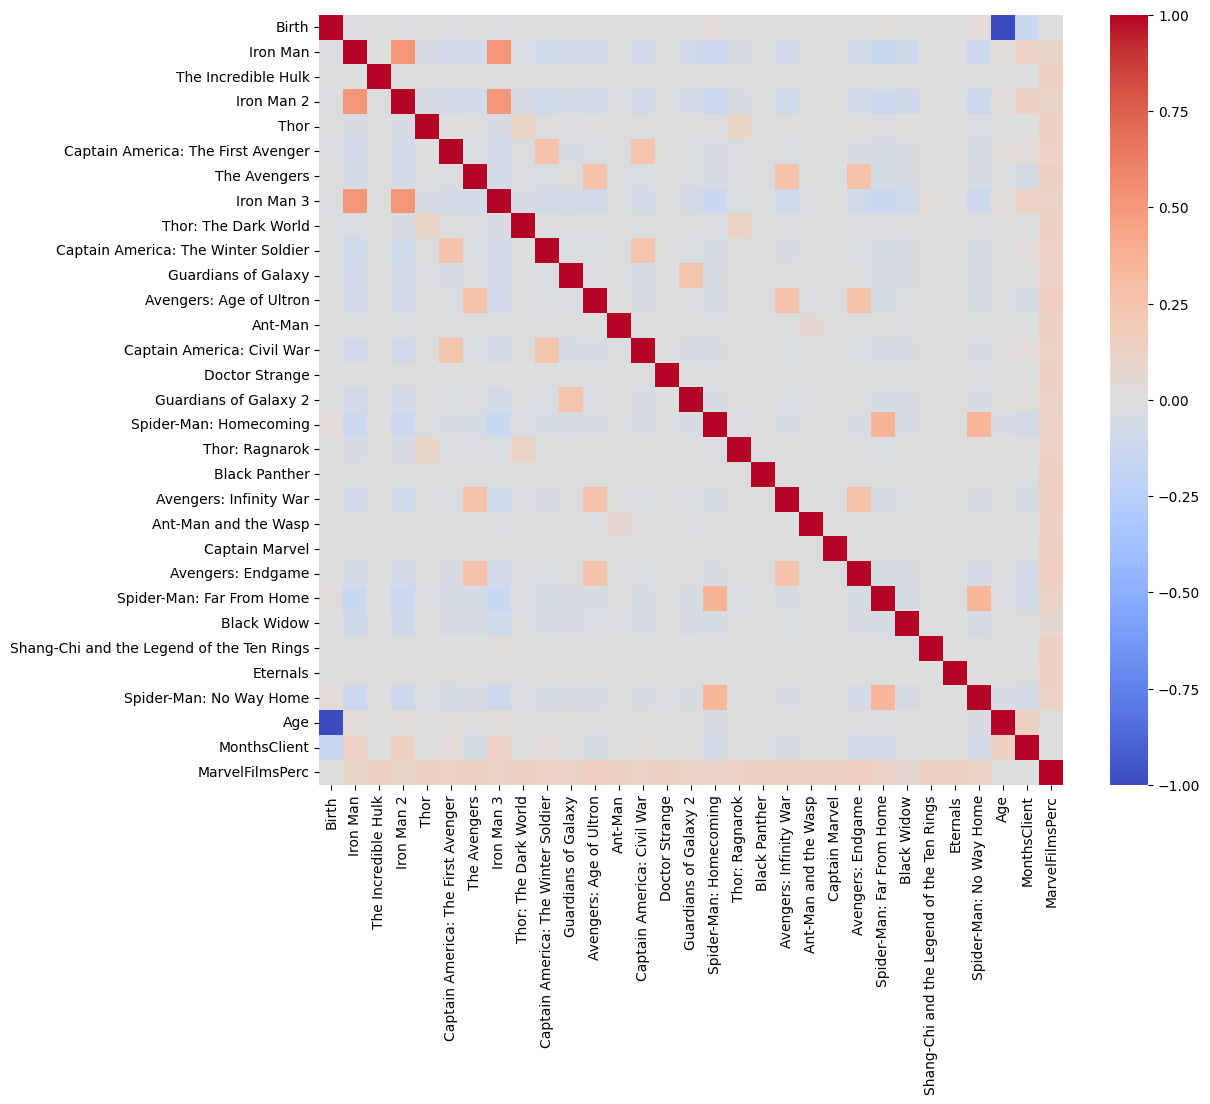

In [30]:
matriz_correlacion = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacion, cmap='coolwarm')

Se puede considerar un par de pasos más en el preprocesamiento y tratamiento de datos para mejorar la calidad del dataset y, por ende, mejorar el rendimiento del sistema de recomendación. 

Codificar las variables categóricas: El personaje de Marvel preferido de cada usuario es una variable categórica que podría ser útil para el sistema de recomendación. Para ello, se podría considerar la codificación One-Hot, que crea una columna binaria separada para cada valor posible de la variable categórica.

Normalizar las variables numéricas: Las variables numéricas, ya que tienen diferentes rangos y escalas. De esta manera, nos aseguramos que todas las variables tengan el mismo peso en el modelo, se podría normalizar las variables numéricas para que tengan una media de cero y una desviación estándar de uno.


# Algoritmos de reglas de asociación 

El algoritmo de Apriori es una herramienta de minería de datos que se aplica para identificar los conjuntos de elementos con mayor frecuencia dentro de un conjunto de datos. Es una técnica muy utilizada en la minería de asociaciones, la cual consiste en descubrir patrones o relaciones relevantes entre diferentes elementos dentro de grandes conjuntos de datos.

A continuación, se muestra el pseudocódigo simplificado del algoritmo A priori:

Entrada: 
- Conjunto de datos D
- Umbral mínimo de soporte minSup
Salida: 
- Conjuntos de elementos frecuentes

// Paso 1: Generar conjuntos de elementos de tamaño 1 que cumplen con el umbral de soporte mínimo
L1 = {}
Para cada elemento e en D:
    Si el soporte(e) >= minSup:
        Agregar e a L1

// Paso 2: Generar conjuntos de elementos de tamaño k a partir de los conjuntos de elementos de tamaño k-1 que cumplen con el umbral de soporte mínimo
k = 2
Lk_1 = L1
Mientras Lk_1 no sea vacío:
    // Generar todos los posibles conjuntos de elementos de tamaño k a partir de Lk_1
    Ck = generar_candidatos(Lk_1)
    // Calcular el soporte de cada conjunto de elementos en Ck
    Lk = {}
    Para cada conjunto de elementos c en Ck:
        Si el soporte(c) >= minSup:
            Agregar c a Lk
    Lk_1 = Lk
    k = k + 1

// Paso 3: Devolver todos los conjuntos de elementos frecuentes encontrados
Conjuntos_frecuentes = union(L1, L2, ..., Lk-1)
Devolver Conjuntos_frecuentes


In [31]:
data_apriori = data.copy()

In [32]:
# Borramos todas las columnas que no son películas
data_apriori = data_apriori.drop(columns = ['ClientID','JoinDate','Gender','Married','Birth','MarvelFavoriteCharacter','Occupation','Age','MonthsClient','MarvelFilmsPerc'])
# Sustituimos los valores del 0 al 10 por 1 y los valores -1 por 0 dentro del conjunto de datos
data_apriori = data_apriori.replace(to_replace=np.arange(0,11), value=1)
data_apriori = data_apriori.replace(to_replace=-1, value=0)

In [33]:
# Conjunto de datos reducido para pruebas
# data_apriori_sample = data_apriori.sample(n=2500, random_state=42)

In [34]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import time

start_time = time.time()

# Aplicar el algoritmo Apriori 
frequent_itemsets = apriori(data_apriori, min_support=0.3, use_colnames=True)

# Generar las reglas de asociación a partir de los conjuntos frecuentes
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Mostrar el tiempo de ejecución
print("--- %s seconds ---" % (time.time() - start_time))

--- 9.707260131835938 seconds ---


In [36]:
# Mostrar las reglas de asociación resultantes
rules[:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(The Incredible Hulk),(Iron Man),0.687140,0.790065,0.543360,0.790757,1.000876,0.000476,1.003309
1,(Iron Man),(The Incredible Hulk),0.790065,0.687140,0.543360,0.687742,1.000876,0.000476,1.001928
2,(Iron Man),(Iron Man 2),0.790065,0.787215,0.644020,0.815148,1.035483,0.022069,1.151110
3,(Iron Man 2),(Iron Man),0.787215,0.790065,0.644020,0.818099,1.035483,0.022069,1.154117
4,(Iron Man),(Thor),0.790065,0.697817,0.547617,0.693130,0.993284,-0.003703,0.984728
5,(Thor),(Iron Man),0.697817,0.790065,0.547617,0.784758,0.993284,-0.003703,0.975348
6,(Iron Man),(Captain America: The First Avenger),0.790065,0.720750,0.565744,0.716074,0.993512,-0.003695,0.983530
7,(Captain America: The First Avenger),(Iron Man),0.720750,0.790065,0.565744,0.784939,0.993512,-0.003695,0.976165
8,(Iron Man),(The Avengers),0.790065,0.723874,0.567941,0.718855,0.993066,-0.003966,0.982147
9,(The Avengers),(Iron Man),0.723874,0.790065,0.567941,0.784586,0.993066,-0.003966,0.974568


In [37]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:

from apyori import apriori
import time

start_time = time.time()

# Convertir el conjunto de datos en una lista de transacciones
data_apriori_list = data_apriori.apply(lambda row: row.index[row == 1].tolist(), axis=1).tolist()

# Definir los parámetros del algoritmo Apriori
soporte_minimo = 0.3
confianza_minima = 0.7
num_reglas = 10

# Aplicar el algoritmo Apriori en los datos
resultados = list(apriori(data_apriori_list, min_support=soporte_minimo, min_confidence=confianza_minima, max_length=num_reglas))


# Mostrar el tiempo de ejecución
print("--- %s seconds ---" % (time.time() - start_time))

--- 116.08489847183228 seconds ---


In [39]:
# Mostrar las reglas de asociación resultantes
for resultado in resultados[:10]:
  print(resultado)

RelationRecord(items=frozenset({'Avengers: Age of Ultron'}), support=0.7240455918703653, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Avengers: Age of Ultron'}), confidence=0.7240455918703653, lift=1.0)])
RelationRecord(items=frozenset({'Avengers: Endgame'}), support=0.7203378192804175, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Avengers: Endgame'}), confidence=0.7203378192804175, lift=1.0)])
RelationRecord(items=frozenset({'Avengers: Infinity War'}), support=0.7203721505081022, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Avengers: Infinity War'}), confidence=0.7203721505081022, lift=1.0)])
RelationRecord(items=frozenset({'Black Widow'}), support=0.7262771216698709, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Black Widow'}), confidence=0.7262771216698709, lift=1.0)])
RelationRecord(items=frozenset({'Captain America: Civil War'}), su

In [40]:
# Reglas algoritmo mlxtend
rules[:5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(The Incredible Hulk),(Iron Man),0.687140,0.790065,0.543360,0.790757,1.000876,0.000476,1.003309
1,(Iron Man),(The Incredible Hulk),0.790065,0.687140,0.543360,0.687742,1.000876,0.000476,1.001928
2,(Iron Man),(Iron Man 2),0.790065,0.787215,0.644020,0.815148,1.035483,0.022069,1.151110
3,(Iron Man 2),(Iron Man),0.787215,0.790065,0.644020,0.818099,1.035483,0.022069,1.154117
4,(Iron Man),(Thor),0.790065,0.697817,0.547617,0.693130,0.993284,-0.003703,0.984728


Los resultados obtenidos por el algoritmo de Apriori y las reglas de asociación muestran que hay algunas películas que tienden a ser vistas juntas con frecuencia, lo que puede ser útil para recomendar películas similares a los usuarios. Por tanto, sabiendo que películas se han visto y cuáles no, es posible recomendar cual es la siguiente que se podría ver.

La primera regla indica que, si alguien ha visto "The Incredible Hulk", también es probable que haya visto "Iron Man". El soporte del antecedente es 0.687140, lo que significa que el 68% de las transacciones contienen "The Incredible Hulk". El soporte del consecuente es 0.790065, lo que significa que el 79% de las transacciones contienen "Iron Man". El soporte de ambas películas juntas es 0.543360, lo que significa que el 54% de las transacciones contienen ambas películas. El valor de confianza es 0.790757, lo que significa que el 79% de las veces que una transacción contiene "The Incredible Hulk", también contiene "Iron Man". El valor de lift es 1.000876, lo que indica que ver "The Incredible Hulk" y "Iron Man" están relacionados neutralmente. Por lo tanto, se puede decir que, si alguien ha visto "The Incredible Hulk", es probable que también haya visto "Iron Man".

La segunda regla es la inversa de la primera, y muestra que, si alguien ha visto "Iron Man", es probable que también haya visto "The Incredible Hulk". Los valores de soporte, confianza y lift son similares a los de la primera regla, ya que esta es la regla inversa de la primera.

La tercera regla indica que, si alguien ha visto "Iron Man 2", es más probable que también haya visto "Iron Man". El soporte del antecedente es 0.787215, lo que significa que el 79% de las transacciones contienen "Iron Man 2". El soporte del consecuente es 0.790065, lo que significa que el 79% de las transacciones contienen "Iron Man". El soporte de ambas películas juntas es 0.644020, lo que significa que el 64% de las transacciones contienen ambas películas. El valor de confianza es 0.818099, lo que significa que el 81% de las veces que una transacción contiene "Iron Man 2", también contiene "Iron Man". El valor de lift es 1.035483, lo que indica que ver "Iron Man 2" y "Iron Man" están relacionados positivamente. Por lo tanto, se puede decir que, si alguien ha visto "Iron Man 2", es probable que también haya visto "Iron Man".

La cuarta regla es la inversa de la tercera, y muestra que, si alguien ha visto "Iron Man", es muy probable que también haya visto "Iron Man 2". Los valores de soporte, confianza y lift son similares a los de la tercera regla, ya que esta es la regla inversa de la tercera.

En la quinta regla se puede observar que el antecedente es "Iron Man" y el consecuente es "Thor". El soporte del antecedente es 0.790065, lo que significa que el 79% de las transacciones contienen "Iron Man". El soporte del consecuente es 0.697817, lo que significa que el 69% de las transacciones contienen "Thor". El soporte de ambas películas juntas es 0.547617, lo que significa que el 54% de las transacciones contienen ambas películas. El valor de confianza es 0.693130, lo que significa que el 69% de las veces que una transacción contiene "Iron Man", también contiene "Thor". El valor de lift es 0.993284, lo que indica que ver "Iron Man" no está muy relacionado con ver "Thor". Por lo tanto, se puede decir que, si alguien ha visto "Iron Man", no necesariamente ha visto "Thor", según los datos analizados.

Se puede decir que algoritmo elegido (mlxtend) si nos sería útil en nuestro caso de uso ya que hemos podido visualizar que gracias al análisis de asociación, permite ayudar a identificar patrones y relaciones entre las películas de Marvel y las preferencias de los usuarios. Con esta información, sería posible generar recomendaciones personalizadas para los usuarios en función de su historial de visualización y sus preferencias de personajes.

La principal diferencia entre el algoritmo Apriori y el algoritmo Eclat es la forma en que manejan los conjuntos de ítems. Mientras que el algoritmo Apriori utiliza una estrategia de "candidatos" para construir los conjuntos de ítems de forma iterativa, el algoritmo Eclat utiliza una estrategia de "partición" para dividir los conjuntos de ítems en subconjuntos más pequeños.

En términos generales, el algoritmo Apriori es mejor para conjuntos de datos con muchos ítems y transacciones relativamente cortas, mientras que el algoritmo Eclat es mejor para conjuntos de datos con menos ítems y transacciones relativamente largas.

Es decir, la elección del algoritmo a utilizar depende de factores como el tamaño del conjunto de datos, la complejidad de las reglas de asociación que se buscan y la cantidad de memoria disponible para su ejecución.

In [41]:
!pip install pyECLAT

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
from pyECLAT import ECLAT
import time

start_time = time.time()

# Copia del DataFrame original
data_eclat = data_apriori.copy()

# Para cada elemento en la copia del DataFrame,
# asignar el nombre de la columna correspondiente si el valor es 1,
# de lo contrario, asignar None
for column in data_apriori.columns:
  data_eclat[column] = data_eclat[column].apply(lambda x: column if x == 1 else None)

# Establecer los nombres de las columnas del DataFrame a una secuencia de números enteros consecutivos
data_eclat = data_eclat.set_axis(range(len(data_eclat.columns)), axis=1)

# Definir los parámetros del algoritmo ECLAT
min_n_products = 2
min_support = 0.5
max_length = 4

# Creamos una instancia ECLAT
my_eclat = ECLAT(data_eclat)

# Entrenamos el algoritmo
rule_indices, rule_supports = my_eclat.fit(min_support=min_support, min_combination=min_n_products, max_combination=max_length)

# Mostrar el tiempo de ejecución
print("--- %s seconds ---" % (time.time() - start_time))

Combination 2 by 2


351it [00:10, 34.53it/s]


Combination 3 by 3


2925it [00:24, 117.40it/s]


Combination 4 by 4


17550it [02:07, 137.76it/s]

--- 166.813321352005 seconds ---


In [43]:
dict(list(rule_supports.items())[:5])

{'Black Widow & Ant-Man': 0.5050810216973359,
 'Black Widow & Doctor Strange': 0.5018195550672893,
 'Black Widow & Spider-Man: Far From Home': 0.5373523757209557,
 'Black Widow & Avengers: Age of Ultron': 0.52592007690195,
 'Black Widow & Ant-Man and the Wasp': 0.5025748420763526}

El algoritmo ECLAT ha tardado en ejecutarse aprox. 166 segundos en comparación con los 9 segundos que tarda el mlxtend o 116 segundos que tarda el apyori. Al igual que con el algoritmo Apriori, las combinaciones contienen varias combinaciones de diferentes películas, pero en este caso no se especifica la puntuación o valoración que los usuarios les han dado, sino que únicamente se tiene en cuenta si han visto la película o no. Los valores que acompañan a cada asociación son las medidas de soporte, que indican la frecuencia con la que aparece un conjunto de elementos en el dataset. En otras palabras, el soporte mide la proporción de transacciones que contienen un conjunto específico de elementos. Cuanto mayor sea el valor de soporte, más frecuente será la asociación.

En los 5 casos mostrados, todos involucran la película "Black Widow".

El primer caso, "Black Widow y Ant-Man", tiene un valor de soporte de 0.505, lo que significa que aproximadamente el 50.5% de los usuarios han visto ambas películas.

El segundo caso, "Black Widow y Doctor Strange", tiene un valor de soporte de 0.502, lo que significa que aproximadamente el 50.2% de los usuarios han visto ambas películas.

El tercer caso, "Black Widow y Spider-Man: Far From Home", tiene un valor de soporte de 0.537, lo que significa que aproximadamente el 53.7% de los usuarios han visto ambas películas.

El cuarto caso, "Black Widow y Avengers: Age of Ultron", tiene un valor de soporte de 0.526, lo que significa que aproximadamente el 52.6% de los usuarios han visto ambas películas.

Finalmente, el quinto caso, "Black Widow y Ant-Man and the Wasp", tiene un valor de soporte de 0.503, lo que significa que aproximadamente el 50.3% de los usuarios han visto ambas películas.

Estos resultados indican que la película "Black Widow" está altamente relacionada con otras películas de Marvel, especialmente con "Spider-Man: Far From Home" y "Avengers: Age of Ultron".




# Filtrado Colaborativo

In [44]:
data.head()

,ClientID,JoinDate,Gender,Married,Birth,MarvelFavoriteCharacter,Occupation,Iron Man,The Incredible Hulk,Iron Man 2,Thor,Captain America: The First Avenger,The Avengers,Iron Man 3,Thor: The Dark World,Captain America: The Winter Soldier,Guardians of Galaxy,Avengers: Age of Ultron,Ant-Man,Captain America: Civil War,Doctor Strange,Guardians of Galaxy 2,Spider-Man: Homecoming,Thor: Ragnarok,Black Panther,Avengers: Infinity War,Ant-Man and the Wasp,Captain Marvel,Avengers: Endgame,Spider-Man: Far From Home,Black Widow,Shang-Chi and the Legend of the Ten Rings,Eternals,Spider-Man: No Way Home,Age,MonthsClient,MarvelFilmsPerc
0,4WKQSBB,1/2/2019,F,M,1987,MJ,politicians,4,2,10,0,6,0,2,9,-1,6,8,-1,4,3,9,10,2,4,8,9,9,-1,10,8,10,1,10,36,51,88.888889
1,CP5S02H,1/6/2019,F,M,1981,Spider-Man,politicians,-1,9,0,10,-1,-1,1,10,10,2,-1,6,9,0,5,10,1,9,4,-1,9,9,10,9,10,1,10,42,47,81.481481
2,2YKDILJ,1/6/2013,M,U,1991,Iron Man,hotel/restaurant,10,-1,10,-1,-1,4,10,-1,-1,4,1,2,3,0,9,-1,-1,9,2,7,4,8,6,-1,4,-1,2,32,121,66.666667
3,2S9E81J,1/8/2019,M,M,1990,MJ,shopkeepers,10,5,7,-1,-1,0,-1,9,10,6,2,-1,3,2,3,10,5,0,9,4,-1,9,10,-1,9,-1,10,33,45,74.074074
4,BHDYVFT,1/8/2019,M,M,1990,Iron Man,politicians,10,2,10,2,4,1,10,0,1,2,-1,5,8,3,8,3,-1,-1,8,-1,8,2,2,4,1,9,7,33,45,85.185185


In [45]:
# lista de columnas
columns_list = list(data.columns[7:34])

# lista de diccionarios para almacenar los datos de las filas
rows_list = []

# Recorrer el DataFrame original línea por línea
for index, row in data.iterrows():
    for char in columns_list:
      # Selección de unicamente las películas vistas
      if row[char] != -1:
        # Agregar un nuevo diccionario a la lista de diccionarios
        rows_list.append({'ClientID': row['ClientID'], 'Gender': row['Gender'], 'Age': row['Age'],'MarvelChar': row['MarvelFavoriteCharacter'],
                              'MovieID': char,'Rating': row[char]})

# Crear un DataFrame a partir de la lista de diccionarios
data_colaborativo = pd.DataFrame(rows_list, columns=["ClientID","Gender","Age","MarvelChar","MovieID","Rating"])

In [46]:
data_colaborativo.head()

,ClientID,Gender,Age,MarvelChar,MovieID,Rating
0,4WKQSBB,F,36,MJ,Iron Man,4
1,4WKQSBB,F,36,MJ,The Incredible Hulk,2
2,4WKQSBB,F,36,MJ,Iron Man 2,10
3,4WKQSBB,F,36,MJ,Thor,0
4,4WKQSBB,F,36,MJ,Captain America: The First Avenger,6


In [47]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
from surprise import Dataset
from surprise import Reader
from surprise import SVD
from surprise import model_selection

# Creamos un objeto Reader con las calificaciones en una escala de 1-10.
reader = Reader(rating_scale=(1, 10))

# Cargamos el dataframe en el formato requerido por Surprise
data = Dataset.load_from_df(data_colaborativo[['ClientID', 'MovieID', 'Rating']], reader)

# Crear un modelo SVD con 50 factores latentes
model = SVD(n_factors=50, n_epochs=50)

# Realizar validación cruzada con k=5
results = model_selection.cross_validate(model, data, cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    3.2193  3.1995  3.2095  3.2035  3.2071  3.2078  0.0067  
MAE (testset)     2.7466  2.7339  2.7454  2.7384  2.7393  2.7407  0.0047  
Fit time          23.49   12.43   12.98   12.65   12.88   14.89   4.31    
Test time         1.13    1.72    1.27    1.28    1.27    1.33    0.20    


In [49]:
# Id del cliente que queremos recomendar
client_id = '6ELSRDQ'

# Obtener el id de cada película que el cliente ya ha visto
movies_watched = list(data_colaborativo[data_colaborativo['ClientID'] == client_id]['MovieID'])

trainset = data.build_full_trainset()

# Ajustar el modelo a los datos
svd = model.fit(trainset)

# Crear un dataset de prueba con las películas que el cliente no ha visto
testset = trainset.build_anti_testset()
testset = filter(lambda x: x[0] == client_id and x[1] not in movies_watched, testset)

# Obtener las predicciones de rating para cada película no vista por el cliente
predictions = svd.test(testset)

# Obtener las 3 películas recomendadas con el rating más alto
top_n = sorted(predictions, key=lambda x: x.est, reverse=True)[:1]

# Imprimir las películas recomendadas
print(f"La siguiente película recomendada para el cliente {client_id} es: {top_n[0].iid}.")

La siguiente película recomendada para el cliente 6ELSRDQ es: Captain America: Civil War.


Ahora, imaginemos que tenemos la siguiente película de Marvel, Doctor Strange in the Multiverse of Madness, y la queremos regalar como primicia a 450 usuarios de la plataforma. Priorizaremos a aquellos que más les pueda gustar.

Para encontrar los 450 usuarios a los que se les ofrecerá la película, podemos utilizar el algoritmo SVD para predecir la valoración que cada usuario daría a la película "Doctor Strange in the Multiverse of Madness". A continuación, podemos ordenar los usuarios según la valoración predicha y seleccionar los primeros 450.

In [50]:
# Creamos un objeto Reader con las calificaciones en una escala de 1-10.
reader = Reader(rating_scale=(1, 10))

# Cargamos el dataframe en el formato requerido por Surprise
data = Dataset.load_from_df(data_colaborativo[['ClientID', 'MovieID', 'Rating']], reader)

# Crear un modelo SVD con 50 factores latentes y 50 épocas de entrenamiento
model = SVD(n_factors=50, n_epochs=50)

# Entrenamos el modelo con todos los datos
trainset = data.build_full_trainset()
model.fit(trainset)

# ID de la película que queremos recomendar
movie_id = 'Doctor Strange in the Multiverse of Madness'

# Obtenemos las valoraciones predichas de todos los usuarios para la película
preds = []
for client_id in data_colaborativo['ClientID'].unique():
    pred = model.predict(client_id, movie_id)
    preds.append((client_id, pred.est))

# Ordenamos a los usuarios según la valoración predicha
preds_sorted = sorted(preds, key=lambda x: x[1], reverse=True)

# Seleccionamos los primeros 450 usuarios
selected_users = [p[0] for p in preds_sorted[:450]]

# Mostramos los usuarios seleccionados
print("Los usuarios seleccionados para recibir la película son:")
print(selected_users)

Los usuarios seleccionados para recibir la película son:
['KPEKZ2S', '968U5XI', '7KGJ7AO', '5KL485O', 'O59BFUP', 'IQ9HON0', 'G1ZGKSO', 'UVGXQIW', 'SVMLLFX', 'QH9ZHX0', '15VW99R', 'SCZVGA2', 'EJI369H', '7IM4XQF', '4WWCUZP', 'C9BGB85', 'EHPZHLW', 'EQ00F4Z', 'INLW7U0', '7LX4F59', 'I7DKL7F', 'DYAKRK4', 'KLOW6HT', '0WWPESG', '6W13JFF', '3ACG7NE', 'KXAJPEA', 'WCCY9IL', 'NM0FMNU', 'DLJZ18M', '8L50LS7', 'IPNQZ9G', '9SUQMGM', '82Q73SF', 'G8HT8L2', '88LLB8C', '71QMCQA', 'HGF4R4S', 'N6JCMWC', 'FY1WYLB', 'W8W3ACY', 'EGO97U3', 'STT9KE5', 'C5LL5CQ', 'EZAKB5J', 'IOGY0DV', '5V1H0JI', 'CT8FPBV', 'C71H45A', 'OT5ZTB7', 'NS5AKIF', 'N0GPPUV', '6QRBWLM', 'B1W9C3N', '653TYS9', 'YY7ZXLP', 'UAYYT6S', 'FDE7ZQJ', '8EKU9Q8', 'YBE43PA', '262ROZW', 'HIUVZYE', 'QHDM85I', '0LKFASU', 'QXLVTVD', '810D9QL', '5RC1G5J', 'E2B4CL4', 'BFT2WPS', '2FD1QNS', 'NZBWSQT', '5X6XQUP', 'EIKE425', '9K67FM8', 'QQV5D5P', 'HT1PEOX', 'RUMJU31', '9WDHNB0', 'L059325', 'QN9DTN5', '7RRQ9IG', 'MKV0HUH', 'P13MMTZ', 'RGJMRZY', 'H48GE18', 'HVRB77